In [1]:
import numpy as np
from scipy.constants import *
import bs4 as bs
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Atoms and Orbitals

In [2]:
orbits = [(1, 's'), (2, 's'), (2, 'p'), (3, 's'), (3, 'p'), 
          (4, 's'), (3, 'd'), (4, 'p'), (5, 's'), (4, 'd'), 
          (5, 'p'), (6, 's'), (4, 'f'), (5, 'd'), (6, 'p'), 
          (7, 's'), (5, 'f'), (6, 'd'), (7, 'p'), (8, 's')]
    
atoms = {
         'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10, 
         'Na': 11, 'Mg': 12, 'Al': 13, 'Si': 14, 'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 'Ca': 20, 
         'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24, 'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28, 'Cu': 29, 'Zn': 30, 
         'Ga': 31, 'Ge': 32, 'As': 33, 'Se': 34, 'Br': 35, 'Kr': 36, 'Rb': 37, 'Sr': 38, 'Y': 39, 'Zr': 40,
         'Nb': 41, 'Mo': 42, 'Tc': 43, 'Ru': 44, 'Rh': 45, 'Pd': 46, 'Ag': 47, 'Cd': 48, 'In': 49, 'Sn': 50, 
         'Sb': 51, 'Te': 52, 'I': 53, 'Xe': 54, 'Cs': 55, 'Ba': 56, 'La': 57, 'Ce': 58, 'Pr': 59, 'Nd': 60, 
         'Pm': 61, 'Sm': 62, 'Eu': 63, 'Gd': 64, 'Tb': 65, 'Dy': 66, 'Ho': 67, 'Er': 68, 'Tm': 69, 'Yb': 70, 
         'Lu': 71, 'Hf': 72, 'Ta': 73, 'W': 74, 'Re': 75, 'Os': 76, 'Ir': 77, 'Pt': 78, 'Au': 79, 'Hg': 80, 
         'Tl': 81, 'Pb': 82, 'Bi': 83, 'Po': 84, 'At': 85, 'Rn': 86, 'Fr': 87, 'Ra': 88, 'Ac': 89, 'Th': 90, 
         'Pa': 91, 'U': 92, 'Np': 93, 'Pu': 94, 'Am': 95, 'Cm': 96, 'Bk': 97, 'Cf': 98, 'Es': 99, 'Fm': 100, 
         'Md': 101, 'No': 102, 'Lr': 103, 'Rf': 104, 'Db': 105, 'Sg': 106, 'Bh': 107, 'Hs': 108, 'Mt': 109, 
         'Ds': 110, 'Rg': 111, 'Cn': 112, 'Nh': 113, 'Fl': 114, 'Mc': 115, 'Lv': 116, 'Ts': 117, 'Og': 118
        }
    

# Particles

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_particles'
resp = requests.get(url)
soup = bs.BeautifulSoup(resp.text)
table = soup.find_all('table', attrs = {'class':'wikitable sortable'})

quarks = table[0].findAll('tr')[1:]
leptons = table[1].findAll('tr')[1:]
bosons = table[2].findAll('tr')[1:]
graviton = table[3] #merge with table[2]

# Quarks

In [4]:
names = []
symbols = []
antiparticles = []
charges = []
masses = []
spins = []

for row in quarks:
    name = row.findAll('td')[0].text
    symbol = row.findAll('td')[1].text
    antiparticle = row.findAll('td')[2].text
    charge = row.findAll('td')[3].text
    mass = row.findAll('td')[4].text
    spin = row.findAll('td')[5].text
    
    names.append(name)
    symbols.append(symbol)
    antiparticles.append(antiparticle)
    charges.append(charge)
    masses.append(mass)
    spins.append(spin)

Quarks = pd.DataFrame({'Name':names,
                     'Symbol':symbols,
                     'Antiparticle':antiparticles,
                     'Charge(e)':charges,
                     'Mass(MeV/c2)':masses,
                     'Spin':spins,
                      })

#Delete \n at end
Quarks['Mass(MeV/c2)'] = Quarks['Mass(MeV/c2)'].str[:-1]
Quarks['Spin'] = Quarks['Spin'].str[:-1]

Quarks

,Name,Symbol,Antiparticle,Charge(e),Mass(MeV/c2),Spin
0,up,u,u,+​2⁄3,2.2+0.6−0.4,​1⁄2
1,down,d,d,−​1⁄3,4.6+0.5−0.4,​1⁄2
2,charm,c,c,+​2⁄3,1280±30,​1⁄2
3,strange,s,s,−​1⁄3,96+8−4,​1⁄2
4,top,t,t,+​2⁄3,"173,100±600",​1⁄2
5,bottom,b,b,−​1⁄3,"4,180+40−30",​1⁄2


# Leptons

In [5]:
names = []
symbols = []
antiparticles = []
charges = []
masses = []
spins = []

for row in leptons:
    name = row.findAll('td')[0].text
    symbol = row.findAll('td')[1].text
    antiparticle = row.findAll('td')[2].text
    charge = row.findAll('td')[3].text
    mass = row.findAll('td')[4].text
    
    names.append(name)
    symbols.append(symbol)
    antiparticles.append(antiparticle)
    charges.append(charge)
    masses.append(mass)
    
Leptons = pd.DataFrame({'Name':names,
                     'Symbol':symbols,
                     'Antiparticle':antiparticles,
                     'Charge(e)':charges,
                     'Mass(MeV/c2)':masses,
                      })

#Delete \n
Leptons['Mass(MeV/c2)'] = Leptons['Mass(MeV/c2)'].str[:-1]
Leptons['Mass(MeV/c2)'][0] = Leptons['Mass(MeV/c2)'][0][:-8]
Leptons['Mass(MeV/c2)'][2] = Leptons['Mass(MeV/c2)'][2][:-8]


Leptons

,Name,Symbol,Antiparticle,Charge(e),Mass(MeV/c2)
0,Electron,e−,e+,−1,0.511
1,Electron neutrino,νe,νe,0,< 0.0000022
2,Muon,μ−,μ+,−1,105.7
3,Muon neutrino,νμ,νμ,0,< 0.170
4,Tau,τ−,τ+,−1,"1,776.86±0.12"
5,Tau neutrino,ντ,ντ,0,< 15.5


# Bosons

In [6]:
names = []
symbols = []
antiparticles = []
charges = []
spins = []
masses = []
interactions = []
observeds = []

for row in bosons:
    name = row.findAll('td')[0].text
    symbol = row.findAll('td')[1].text
    antiparticle = row.findAll('td')[2].text
    charge = row.findAll('td')[3].text
    spin = row.findAll('td')[4].text
    mass = row.findAll('td')[5].text
    interaction = row.findAll('td')[6].text
    observed = row.findAll('td')[7].text
    
    names.append(name)
    symbols.append(symbol)
    antiparticles.append(antiparticle)
    charges.append(charge)
    masses.append(mass)
    spins.append(spin)
    interactions.append(interaction)
    observeds.append(observed)

Bosons = pd.DataFrame({'Name':names,
                     'Symbol':symbols,
                     'Antiparticle':antiparticles,
                     'Charge(e)':charges,
                     'Spin':spins,
                     'Mass(GeV/c2)':masses,
                     'Interaction Mediated':interactions,
                     'Observed':observeds,

                      })

#Delete \n
Bosons['Observed'] = Bosons['Observed'].str[:-1] 

Bosons

,Name,Symbol,Antiparticle,Charge(e),Spin,Mass(GeV/c2),Interaction Mediated,Observed
0,Photon,γ,Self,0,1,0,Electromagnetism,Yes
1,W boson,W−,W+,−1,1,80.385±0.015,Weak interaction,Yes
2,Z boson,Z,Self,0,1,91.1875±0.0021,Weak interaction,Yes
3,Gluon,g,Self,0,1,0,Strong interaction,Yes
4,Higgs boson,H0,Self,0,0,125.09±0.24,Mass,Yes


# Electron Configuration

In [12]:
def electron_configuration(n='',element='',charge=0,abbr=True):       #element,charge,abbr = T/F
     
    """
    Electron configuration for all elements, following Madelung rule; exceptions not included.
    n = number of electrons OR element = atomic symbol, charge = ionization
    """
    
    #Assign atomic number based on element
    if element:
        element = element.title()
        n = atoms[element]
        #ion, remove electrons for positive charge, add electrons for negative charge
        if charge:
            n-=charge
             
    result = ''
    
    if int(n) > 118:
        raise Exception('electrons cannot exceed 118')
    
    #for use in abbreviated
    electron = n
    
    #Assigning electron count based on azimuthal quantum number
    
    for orbit in orbits:
        subshell = ''
        electron_count = 0
    
        if orbit[1] == 's':
            add = 2
        elif orbit[1] == 'p':
            add = 6
        elif orbit[1] == 'd':
            add = 10
        elif orbit[1] == 'f':
            add = 14
        
        #Adding electrons to subshell
        while add > 0:
            electron_count += 1
            n-=1
            if n == 0:
                break
            add -= 1
        subshell += str(orbit[0]) + orbit[1] + str(electron_count)
        result += subshell + ' '
        
        if n == 0:
            break
    
    #Abbreviated EC 
    if not abbr:
        return result
    
    elif abbr:
        #Noble gas atomic numbers
        noble = [2,10,18,36,54,86,118,2000]   
        
        #Noble gas elements
        noble_ec = {'He':electron_configuration(element='He',abbr = False) , 
            'Ne': electron_configuration(element='Ne',abbr = False),
            'Ar': electron_configuration(element='Ar',abbr = False),
            'Kr': electron_configuration(element='Kr',abbr = False),
            'Xe': electron_configuration(element='Xe',abbr = False),
            'Rn': electron_configuration(element='Rn',abbr = False),
            'Og': electron_configuration(element='Og',abbr = False),
            }
        #Find noble gas with atomic number less than input
        for index in range(len(noble)):
            if noble[index]>electron:
                N = noble[index-1]
                break
        
        #Replace beginning of string with noble gas EC with noble gas element name
        if N == noble[0]:
            noble_gas = 'He'
        elif N == noble[1]:
            noble_gas = 'Ne'
        elif N == noble[2]:
            noble_gas = 'Ar'
        elif N == noble[3]:
            noble_gas = 'Kr'
        elif N == noble[4]:
            noble_gas = 'Xe'
        elif N == noble[5]:
            noble_gas = 'Rn'
        elif N == noble[6]:
            noble_gas = 'Og'
        result = result.replace(noble_ec[noble_gas],'[' + noble_gas + ']' + ' ')
        
        return result
    
print(electron_configuration(n=57,abbr=True))

[Xe] 6s2 4f1 


# Quantum

In [8]:
class Quantum:
    """
    Quantum formulas
    """
    def pauli_matrix(mat):
        sigx = np.matrix([[0,1],[1,0]])
        sigy = np.matrix([[0,-1j],[1j,0]])
        sigz = np.matrix([[1,0],[0,-1]])
        if mat.lower() == 'x':
            return sigx
        if mat.lower() == 'y':
            return sigy
        if mat.lower() == 'z':
            return sigz

    def combination(n):
        """
        n,l,ml combinations for quantum level n
        """
        l = range(0,n)
        result = []
        for sub in l:
            ml = range(-sub,sub+1)
            for orbital in ml:
                result.append((n,sub,orbital))
        return result

    def principle(n='',s=''): 
        """
        Properties of energy level, n. Returns value of n, shell letter,
        available azimuthals (l) and corresponding subshell/orbital letters,
        highest ml range, orbital count, and max electrons available to level n.
        """
        shells = {1:'K',2:'L',3:'M',4:'N',5:'O',6:'P',7:'Q'}          #shell letters
        letters = {'K': 1,'L':2,'M':3,'N':4,'O': 5,'P':6,'Q':7}       #shell numbers
        subshells = {0:'s',1:'p',2:'d',3:'f',4:'g',5:'h',6:'i'}       #subshell letters

        if n and s:
            raise Exception('Can only accept value for either n or s')
        if s:
            s = s.upper()                                             #Allow upper or lower case
            if s not in letters:
                raise Exception('{0} is not a valid shell'.format(s))
            n = letters[s]

        if n > 7:
            raise Exception('n cannot be greater than 7')

        shell = shells[n]                                             #corresponding shell letter to n
        subshell = [str(n) + subshells[index] for index in range(n)]  #corresponding subshell letter to l values
        electrons = 2*n**2                                            #total possible electrons in level n
        
        #Paramagnetic or diamagnetic
        if electrons % 2 == 0:
            magnetic_type = 'Diamagnetic'
        elif electrons % 2 != 0:
            magnetic_type = 'Paramagnetic'
            
        orbitals = n**2                                               #total number of orbitals in level n
        l = list(range(0,n))                                          #every l in level n
        ml = list(range(-(n-1),n))                                    #highest possible ml range

        result = {'n':n,'l':l,'ml':ml,'Shell':shell,'Subshells':subshell,'Electrons':electrons,'Orbitals':orbitals,'Magnetic Type':magnetic_type}

        return result


    def azimuthal(l='',s=''):
        """
        Properties of given azimuthal, l. Allows numerical l value or 
        subshell letter as input. Returns value of l, subshell/orbital 
        letter, ml range of l, orbital count, and max electrons available to l.
        """

        letters = {'s':0,'p':1,'d':2,'f':3,'g':4,'h':5,'i': 6}        #subshell numbers
        subshells = {0:'s',1:'p',2:'d',3:'f',4:'g',5:'h',6:'i'}       #subshell letters

        if l and s:
            raise Exception('Can only accept a value for either l or s')

        if s:
            s = s.lower()                                             #Allow upper or lower case
            if s not in letters:
                raise Exception('{0} is not a valid subshell'.format(s))
            l = letters[s]

        if l > 6:
            raise Exception('l cannot be greater than 6')

        ml = list(range(-l,l+1))                                      #ml range
        subshell = subshells[l]                                       #subshell letter
        orbitals = (2*l + 1)                                          #total number orbits in subshell l
        electrons = 2*orbitals                                        #total possible electron in subshell l, or (2l+1)*2

        result = {'l':l,'ml':ml,'Subshell':subshell,'Electrons':electrons, 'Orbitals':orbitals}

        return result
    
    def energy(n,z=1):
        """
        Quantum energy in single electron atom in eV
        """
        return (-13.6*z**2)/(n**2)

    def hydrogen(n):
        """
        Returns properties of energy level n and electron in hydrogen atom: radius, wavelength, and energy
        """
        a0 = 0.0529 #bohr radius in nm
        r = a0*n**2 #nm
        l = 2*np.pi*n*a0
        energy = -13.6/(n**2) #eV
        result = {'radius':r,'wavelength':l,'energy':energy}
        return result

    def rydberg(ni,nf,z=1):
        """
        Rydberg electron transitions. Returns wavelength in nm, frequency in Hz, 
        energy in eV, emission or absorption, spectral series
        """

        if type(ni)==float or type(nf)==float:
            raise TypeError('Energy levels must be whole integer')
        if ni<=0 or nf<=0:
            raise Exception('Energy levels cannot be less than 0')

        #Wavelength

        levels = ((1.0/(nf**2))-(1.0/(ni**2)))
        L = abs((z**2 * Rydberg * levels)**-1)    #meters wavelength
        l = L*10**9                               #nanometers

        #Frequency

        f = 1/L #Hz

        #Energy

        energy = -13.6 * (z**2) * levels #eV

        #Series and Emission Type

        series = {1:'Lyman', 2:'Balmer', 3:'Paschen', 4:'Brackett', 5:'Pfund', 6:'Humphreys'}

        if ni>nf:
            light = series[nf]
            Type = 'Emission'
        elif ni<nf:
            light = series[ni]
            Type = 'Absorption'     

        #Wave type

        if l < 1e-3:
            wave = 'Gamma'
        elif 1e-3 < l < 10:
            wave = 'X-ray'
        elif 10 < l < 400:
            wave = 'Ultraviolet'
        elif 400 < l < 750:
            wave = 'Visible'
            if 400 < l < 435:
                color = 'Violet'
            elif 435 < l < 500:
                color = 'Blue'
            elif 500 < l < 520:
                color = 'Cyan'
            elif 520 < l < 565:
                color = 'Green'
            elif 565 < l < 590:
                color = 'Yellow'
            elif 590 < l < 625:
                color = 'Orange'
            elif 625 < l < 750:
                color = 'Red'
            wave += ', ' + color      
        elif 750 < l < 25e3:
            wave = 'Infrared'
        elif 25e3 < l < 1e6:
            wave = 'Microwave'
        elif 1e6 < l:
            wave = 'Radio'  

        result = {'Wavelength':l,'Frequency':f,'Energy':energy,'Series':light,'Light':wave,'Type':Type}

        return result
 

print(Quantum.rydberg(2,5))

print(Quantum.principle(n=4))

print(Quantum.azimuthal(l=3))

{'Wavelength': 433.93669075351784, 'Frequency': 2304483.6293136, 'Energy': 2.856, 'Series': 'Balmer', 'Light': 'Visible, Violet', 'Type': 'Absorption'}
{'n': 4, 'l': [0, 1, 2, 3], 'ml': [-3, -2, -1, 0, 1, 2, 3], 'Shell': 'N', 'Subshells': ['4s', '4p', '4d', '4f'], 'Electrons': 32, 'Orbitals': 16, 'Magnetic Type': 'Diamagnetic'}
{'l': 3, 'ml': [-3, -2, -1, 0, 1, 2, 3], 'Subshell': 'f', 'Electrons': 14, 'Orbitals': 7}


# Bohr Atom

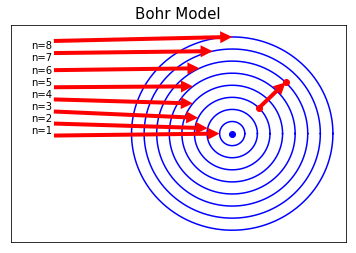

In [9]:
#%matplotlib

def rydberg_circle(ni,nf,z=1):
    """
    Plot electron transition on a hydrogen like atom. Radii are based on energies of levels.
    """
    if type(ni)==float or type(nf)==float:
        raise TypeError('Energy levels must be whole integer')
    if ni<=0 or nf<=0:
        raise Exception('Energy levels cannot be less than 0')
        
    theta = np.linspace(0,2*np.pi,1000) #360 degrees
    levels = np.arange(1,9)             #energy levels around atom
    
    #Plotting energy level circles
    for r in levels:
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        plt.plot(x,y, color = 'b')

    cos = np.cos(.25*np.pi)
    sin = np.sin(.25*np.pi)
    
    #Transition arrow
    plt.plot(levels[nf-1]*cos, levels[nf-1]*sin, 'or') #higher
    plt.plot(levels[ni-1]*cos, levels[ni-1]*sin, 'or') #lower
    #plot text energy levels next to marks
    plt.annotate('', xy =(nf*cos,nf*sin),xytext=(ni*cos,ni*sin), arrowprops={'facecolor':'r', 'linewidth':0})
    
    #levels arrows  
    arrowtheta = np.linspace(np.pi,np.pi/2,len(levels)) #change for spacing
    height = 0
    for index in range(len(levels)):
        txt = 'n=' + str(index+1)
        plt.annotate(txt, xy =(levels[index]*np.cos(arrowtheta[index]),levels[index]*np.sin(arrowtheta[index])), xytext=(-16,height), arrowprops={'facecolor':'r', 'linewidth':0})
        height+=1
        
    #Remove axis labels
    plt.xticks([])
    plt.yticks([])
    
    plt.plot(0,0,'ob')  
    plt.title('Bohr Model', fontsize = 15)
    lim = max(levels)
    plt.axis([-2.2*lim,lim+1,-lim-1,lim+1]) #xmin, xmax, ymin, ymax
    plt.show()
    
rydberg_circle(3,6)

# Electron Transition

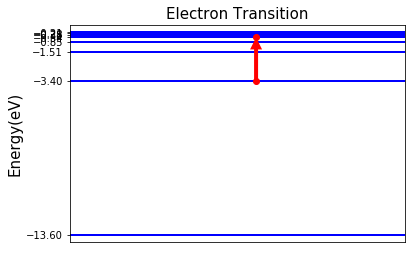

In [10]:
#%matplotlib

def rydberg_line(ni,nf,z = 1):
    """
    Electron transition lines. Levels are separated by energy.
    """
    if type(ni)==float or type(nf)==float:
        raise TypeError('Energy levels must be whole integer')
    if ni<=0 or nf<=0:
        raise Exception('Energy levels cannot be less than 0')
        
    #Plotting all energy levels
    n = np.arange(1,9)             #levels, n
    levels = Quantum.energy(n,z)   #energies of n
    plt.yticks(levels)             #label y-axis with energies of n
    x = np.arange(0,10)            #length of lines

    for line in n:
        plt.plot(x,[levels]*len(x), color='b')
    
    #plotting points and arrow
    if ni > nf:                 #arrow down
        t = np.arange(nf,ni+1)
    elif ni < nf:               #arrow up
        t = np.arange(ni,nf+1)
    xaxis = 5
    plt.plot(xaxis,Quantum.energy(ni), 'or')
    plt.plot(xaxis,Quantum.energy(nf), 'or')
    #plot text energy levels next to marks
        
    #Arrow
    plt.annotate('', xy = (xaxis,Quantum.energy(nf)),xytext=(xaxis,Quantum.energy(ni)), arrowprops={'facecolor':'r', 'linewidth':0})
    
    plt.title('Electron Transition', fontsize=15)
    plt.ylabel('Energy(eV)', fontsize=15)
    plt.xticks([])
    plt.axis([min(x),max(x),min(levels)-0.5,max(levels)+0.5]) #xmin,xmax,ymin,ymax
    plt.show()
    
rydberg_line(2,5)

# Relativity

In [11]:
def gamma(v):                      
    """
    Relativistic constant
    """
    error(v)
    return (np.sqrt(1 - (v/c)**2))**(-1)
    
def error(v):
    """
    v cannot be greater than c or less than 0
    """
    if v<0 or v>=c:
        raise Exception('v must be greater than or equal to 0 and less than c')
    else:
        pass

def beta(v):
    """
    v/c ratio
    """
    error(v)
    return v/c

class Relativity:
    """
    Relativity formulas
    """

    def length(l0,v):  
        """
        Lorentz-Fitzgerald length contraction
        """
        l = l0/gamma(v)
        result = {'Relativistic Length':l, 'Ratio':(l/l0)}
        return result

    def time(t0,v):
        """
        Time dilation
        """
        t = t0*gamma(v)
        result = {'Relativistic Time':t, 'Ratio':(t/t0)}
        return result

    def mass(m0,v):       
        """
        Relativistic mass
        """
        m = m0*gamma(v)
        result = {'Relativistic Mass':m, 'Ratio':(m/m0)}
        return result

    def energy(m0,v=0):      
        """
        Relativistic energy
        """
        rest = m0*c**2                    #rest energy
        result = {'Rest Energy':rest}
        if v:
            re = m0*c**2*gamma(v)        #relativistic energy
            ke = re - rest               #kinetic energy
            result['Relativistic Energy'] = re
            result['Kinetic Energy'] = ke
            result['Ratio'] = re/rest
        return result

    def cyclotron(q,B,m,v):
        """
        Relativistic cyclotron frequency
        """
        w = (q*B)/(m*gamma(v))
        result = {'Relativistic Frequency':w, 'Ratio':(w/w0)}
        return result

    def momentum(m0,v):     
        """
        Relativistic momentum
        """
        p = m0*v*gamma(v)
        result = {'Relativistic Momentum':p, 'Ratio':(p/(m0*v))}
        return result

    def doppler(fs,v,direction='to'):               
        """
        Relativistic doppler
        """
        if direction == 'away':
            v*=-1
        fo = fs*np.sqrt((1+beta(v))/(1-beta(v)))
        result = {'Relativistic Frequency':fo, 'Ratio':(fo/fs)}
        return result

    def grav_td(t0,M,R):
        """
        Gravitational time dilation
        """
        t = t0 / np.sqrt(1 - (2*G*M)/(R*c**2))
        result = {'Relativistic Time':t,'Ratio':(t/t0)}
        return result

    def lorentz(x,y,z,t,v):
        """
        Lorentz transformations
        """
        xp = (x-v*t)*gamma(v)
        yp = y
        zp = z
        tp = (t - (v*x)/(c**2)) * gamma(v)
        result = {"x'":xp,"y'":yp,"z'":zp,"tp'":tp}
        return result 
    
print(Relativity.energy(5000,0.5*c))

print(Relativity.mass(5000,0.5*c))

{'Rest Energy': 4.493775893684088e+20, 'Relativistic Energy': 5.188965443792719e+20, 'Kinetic Energy': 6.951895501086314e+19, 'Ratio': 1.1547005383792517}
{'Relativistic Mass': 5773.5026918962585, 'Ratio': 1.1547005383792517}
